In [30]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [31]:
pip install pandas scikit-learn nltk


In [32]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [33]:
import re
import nltk

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, classification_report

In [34]:
df = pd.read_csv("sentiment_analysis.csv")

print("Dataset loaded successfully")
print(df.head())

Dataset loaded successfully
   Year  Month  Day Time of Tweet  \
0  2018      8   18       morning   
1  2018      8   18          noon   
2  2017      8   18         night   
3  2022      6    8       morning   
4  2022      6    8          noon   

                                                text sentiment     Platform  
0              What a great day!!! Looks like dream.  positive    Twitter    
1     I feel sorry, I miss you here in the sea beach  positive    Facebook   
2                                     Don't angry me  negative     Facebook  
3  We attend in the class just for listening teac...  negative    Facebook   
4                  Those who want to go, let them go  negative   Instagram   


In [35]:
print("Columns:", df.columns)

print("\nMissing values:")
print(df.isnull().sum())

print("\nUnique sentiment values BEFORE cleaning:")
print(df['sentiment'].unique())


Columns: Index(['Year', 'Month', 'Day', 'Time of Tweet', 'text', 'sentiment',
       'Platform'],
      dtype='object')

Missing values:
Year             0
Month            0
Day              0
Time of Tweet    0
text             0
sentiment        0
Platform         0
dtype: int64

Unique sentiment values BEFORE cleaning:
['positive' 'negative' 'neutral']


In [36]:

df['sentiment'] = df['sentiment'].astype(str).str.lower()

df = df[df['sentiment'].isin(['positive', 'negative'])]
df['sentiment'] = df['sentiment'].map({
    'positive': 1,
    'negative': 0
})

print("\nUnique sentiment values AFTER cleaning:")
print(df['sentiment'].unique())



Unique sentiment values AFTER cleaning:
[1 0]


In [37]:
df = df.dropna(subset=['text', 'sentiment'])

print("New dataset shape:", df.shape)


New dataset shape: (300, 7)


In [38]:
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()


In [39]:
def preprocess_text(text):

    text = text.lower()

    text = re.sub(r'[^a-zA-Z]', ' ', text)

    tokens = text.split()

    tokens = [word for word in tokens if word not in stop_words]

    tokens = [stemmer.stem(word) for word in tokens]

    return " ".join(tokens)

In [40]:
df['cleaned_review'] = df['text'].apply(preprocess_text)

print("\nExample preprocessing:")
df[['text','cleaned_review']].head()



Example preprocessing:


,text,cleaned_review
0,What a great day!!! Looks like dream.,great day look like dream
1,"I feel sorry, I miss you here in the sea beach",feel sorri miss sea beach
2,Don't angry me,angri
3,We attend in the class just for listening teac...,attend class listen teacher read slide nonsenc
4,"Those who want to go, let them go",want go let go


In [41]:
X = df['cleaned_review']

y = df['sentiment']

print(X.head())

print(y.head())

0                         great day look like dream
1                         feel sorri miss sea beach
2                                             angri
3    attend class listen teacher read slide nonsenc
4                                    want go let go
Name: cleaned_review, dtype: object
0    1
1    1
2    0
3    0
4    0
Name: sentiment, dtype: int64


In [42]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

print("Train size:", X_train.shape)

print("Test size:", X_test.shape)


Train size: (240,)
Test size: (60,)


In [43]:
vectorizer = TfidfVectorizer(max_features=5000)

X_train_tfidf = vectorizer.fit_transform(X_train)

X_test_tfidf = vectorizer.transform(X_test)

print("TF-IDF shape:", X_train_tfidf.shape)


TF-IDF shape: (240, 734)


In [44]:
nb_model = MultinomialNB()

nb_model.fit(X_train_tfidf, y_train)

nb_pred = nb_model.predict(X_test_tfidf)

print("\nNaive Bayes Accuracy:", accuracy_score(y_test, nb_pred))

print("\nNaive Bayes Classification Report:")

print(classification_report(y_test, nb_pred))



Naive Bayes Accuracy: 0.7166666666666667

Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.58      0.68        31
           1       0.66      0.86      0.75        29

    accuracy                           0.72        60
   macro avg       0.74      0.72      0.71        60
weighted avg       0.74      0.72      0.71        60



In [45]:
lr_model = LogisticRegression(max_iter=1000)

lr_model.fit(X_train_tfidf, y_train)

lr_pred = lr_model.predict(X_test_tfidf)

print("\nLogistic Regression Accuracy:", accuracy_score(y_test, lr_pred))

print("\nLogistic Regression Classification Report:")

print(classification_report(y_test, lr_pred))



Logistic Regression Accuracy: 0.7166666666666667

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.65      0.70        31
           1       0.68      0.79      0.73        29

    accuracy                           0.72        60
   macro avg       0.72      0.72      0.72        60
weighted avg       0.72      0.72      0.72        60



In [46]:
sample = "I love using this platform, it is amazing"

sample_clean = preprocess_text(sample)

sample_vector = vectorizer.transform([sample_clean])

print("\nCustom text:", sample)

print("Naive Bayes Prediction:",
      "Positive" if nb_model.predict(sample_vector)[0] == 1 else "Negative")

print("Logistic Regression Prediction:",
      "Positive" if lr_model.predict(sample_vector)[0] == 1 else "Negative")



Custom text: I love using this platform, it is amazing
Naive Bayes Prediction: Positive
Logistic Regression Prediction: Positive


In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


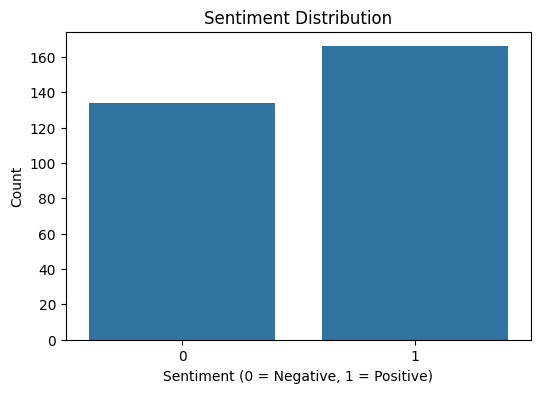

In [49]:
plt.figure(figsize=(6,4))

sns.countplot(x='sentiment', data=df)

plt.title("Sentiment Distribution")
plt.xlabel("Sentiment (0 = Negative, 1 = Positive)")
plt.ylabel("Count")

plt.show()


In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression


In [51]:


rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

rf_model.fit(X_train_tfidf, y_train)


rf_pred = rf_model.predict(X_test_tfidf)

print("\nRandom Forest Accuracy:", accuracy_score(y_test, rf_pred))

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_pred))



Random Forest Accuracy: 0.7833333333333333

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.77      0.79        31
           1       0.77      0.79      0.78        29

    accuracy                           0.78        60
   macro avg       0.78      0.78      0.78        60
weighted avg       0.78      0.78      0.78        60

